# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
if mortality:
    perusmalli_start='best/v2_malli_base_dev'
    perusmalli='best/v2_malli_base_dev'
    perusresults='results/v2_malli_base_dev_stoch'
    prefmalli='best/v2_malli_perus_prefnoise'
    prefresults='results/v2_perus_results_prefnoise'
else:
    perusmalli_start='best/v2_malli_baseline3test_nomort'
    perusmalli='best/v2_malli_base_nomort'
    perusresults='results/v2_malli_base_nomort'
    baseline_results='results/v2_malli_baseline_nomort'
    prefmalli='best/v2_malli_perus_prefnoise_nomort'
    prefresults='results/v2_perus_results_prefnoise_nomort'
    
tva_savefile='results/v2_tvaresults'
    
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

year=2018

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v3',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year,version=3)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli_start,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear',log_interval=1000)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 3
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 292      |
| nupdates           | 1        |
| policy_entropy     | 1.39

---------------------------------
| explained_variance | 0.999    |
| fps                | 759      |
| nupdates           | 3000     |
| policy_entropy     | 1.38     |
| policy_loss        | -0.00392 |
| total_timesteps    | 5040000  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 791      |
| nupdates           | 4000     |
| policy_entropy     | 1.43     |
| policy_loss        | -0.0196  |
| total_timesteps    | 6720000  |
| value_loss         | 0.0273   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 835      |
| nupdates           | 5000     |
| policy_entropy     | 1.4      |
| policy_loss        | -0.0354  |
| total_timesteps    | 8400000  |
| value_loss         | 0.0234   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

Population:   0%|          | 0/10000 [00:00<?, ? p/s]

In [6]:
#cc1a=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year)
#cc1a.load_sim(perusresults)
#cc1a.comp_aggkannusteet(n=50,savefile=tva_savefile)
#cc1a.plot_aggkannusteet(tva_savefile)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 2
n_pop 10000
Ave reward 229.8263138568731


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Rahavirrat skaalattuna väestötasolle
+----------------------+-----------------------+----------------------+----------------------+
|                      |                   e/v |              toteuma |                  ero |
|----------------------+-----------------------+----------------------+----------------------|
| tyotulosumma         |  92,129,979,047.67    | 89,134,200,000.00    |  2,995,779,047.67    |
| etuusmeno            |  42,981,088,890.00    | 39,279,916,450.00    |  3,701,172,440.00    |
| verot+maksut         |  34,575,714,446.60    | 34,025,549,800.00    |    550,164,646.60    |
| muut tulot           |   8,405,374,443.40    |  5,254,366,650.00    |  3,151,007,793.40    |
| valtionvero          |   3,939,607,918.58    |  5,542,000,000.00    | -1,602,392,081.42    |
| kunnallisvero        |  20,366,034,708.62    | 18,991,000,000.00    |  1,375,034,708.62    |
| ptel                 |   6,222,454,466.46    |  5,560,000,000.00    |    662,454,466.46    |
| tyotvakmaks

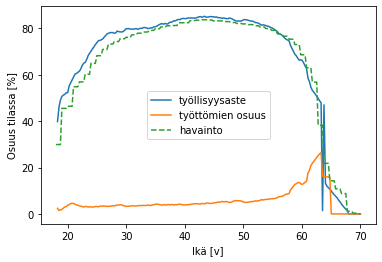

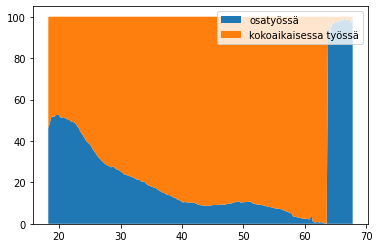

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


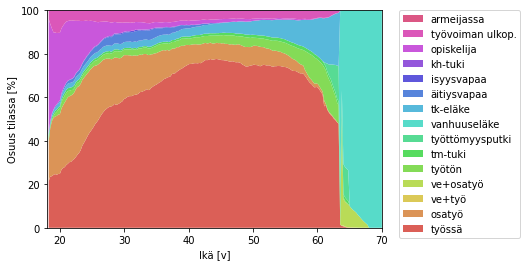

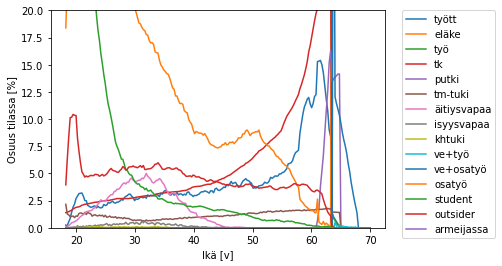

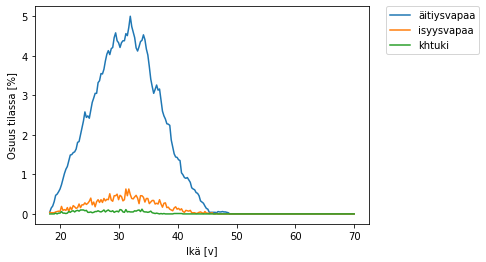

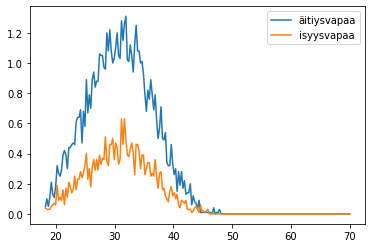

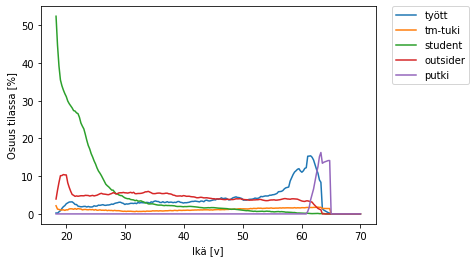

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


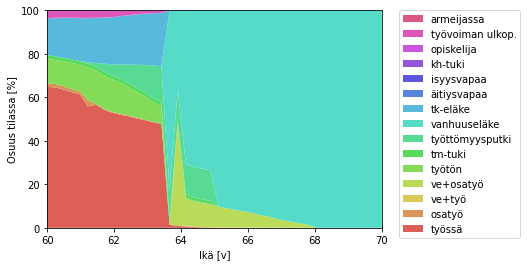

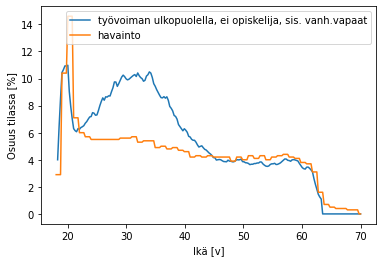

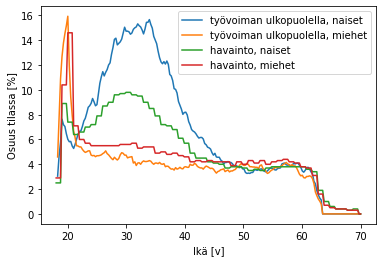

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.53 |      0.33 |       0.14 |      0.00 |        0.00 |
| 30-39 |     0.49 |      0.33 |       0.17 |      0.01 |        0.00 |
| 40-49 |     0.47 |      0.32 |       0.19 |      0.02 |        0.00 |
| 50-59 |     0.44 |      0.31 |       0.21 |      0.03 |        0.00 |
| 60-65 |     0.21 |      0.17 |       0.16 |      0.11 |        0.36 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.88 |     

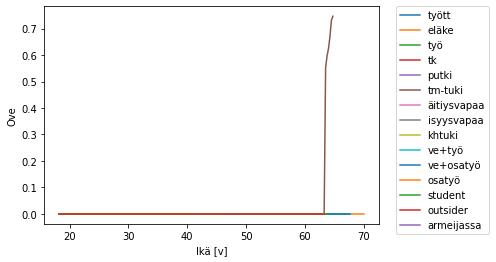

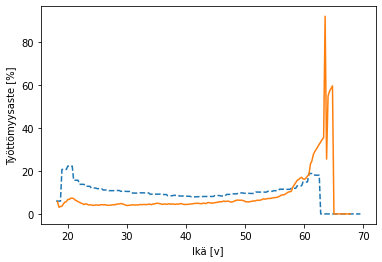

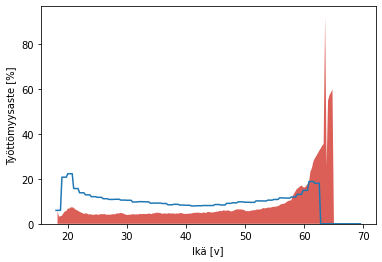

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


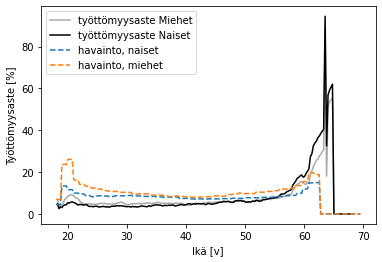

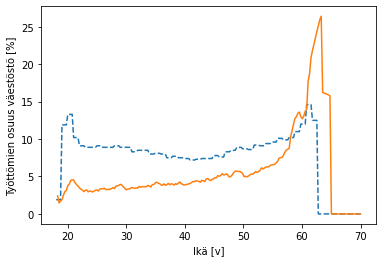

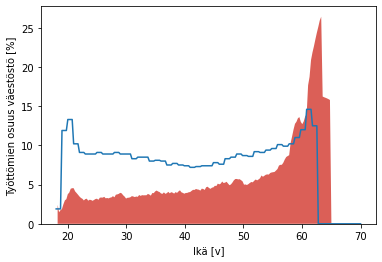

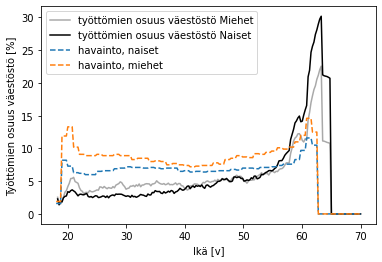

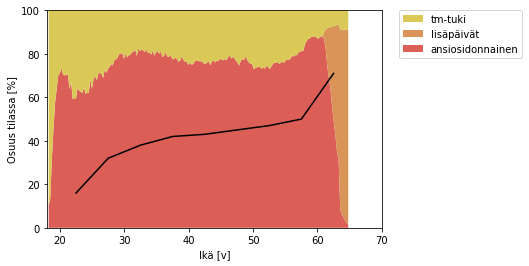

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


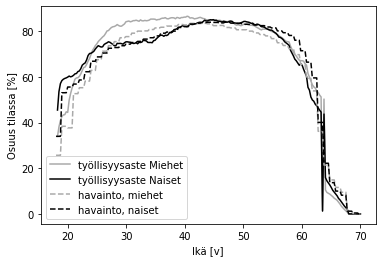

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


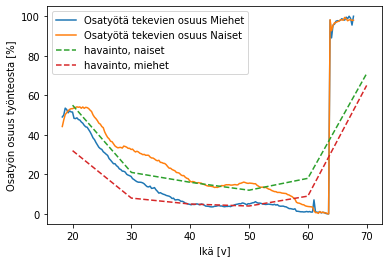

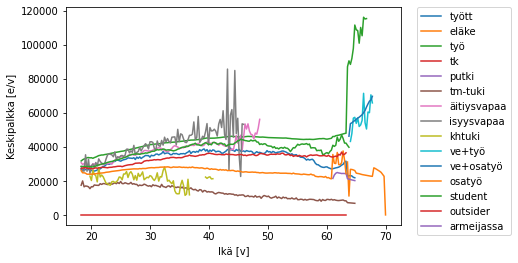

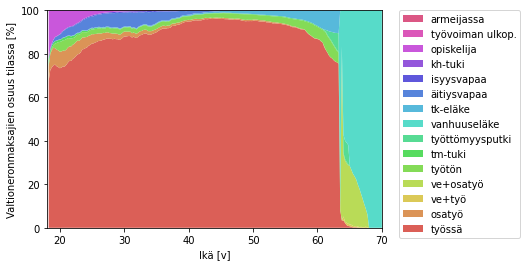

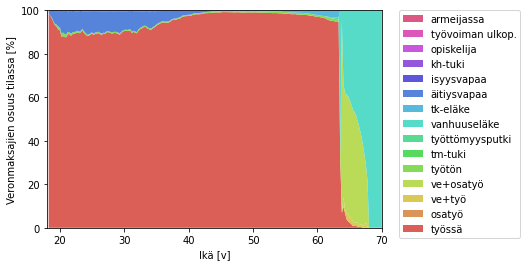

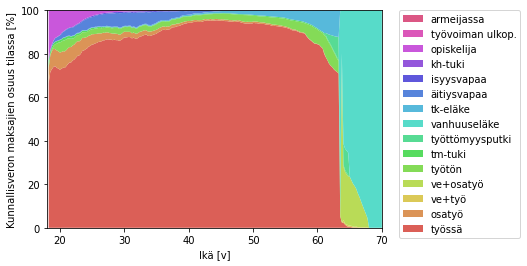

Valtionveron maksajien osuus
Etuudella olevat 5.09
Työssä 84.98
Eläkkeellä 12.50

Kunnallisveron maksajien osuus
Etuudella olevat 6.35
Työssä 68.87
Eläkkeellä 25.74

Veronmaksajien osuus
Etuudella olevat 6.14
Työssä 71.49
Eläkkeellä 23.58



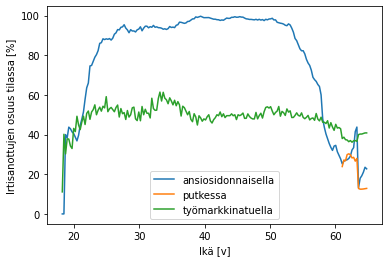

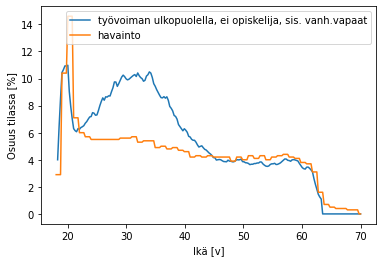

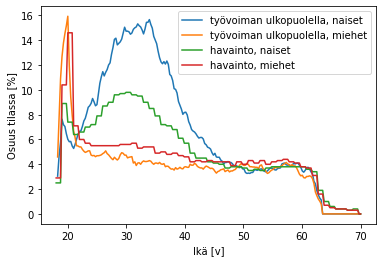

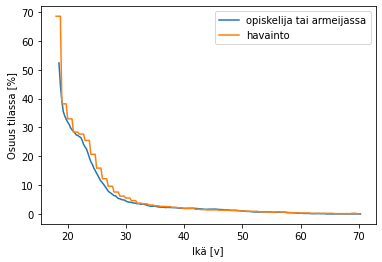

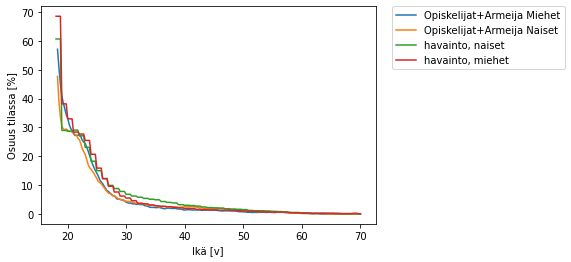

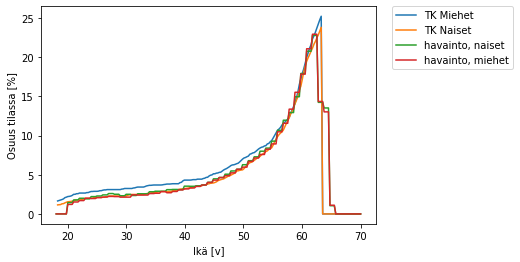

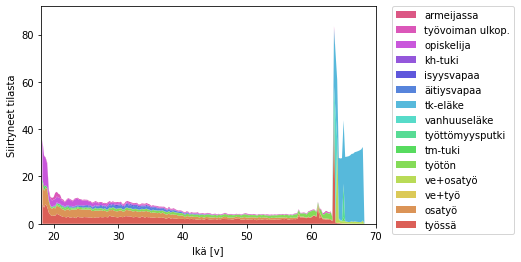

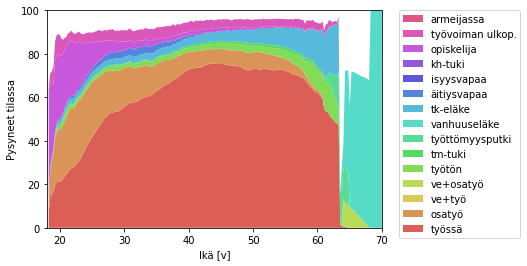

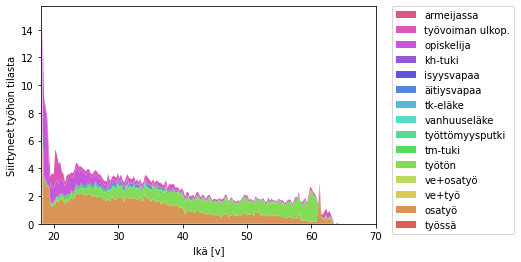

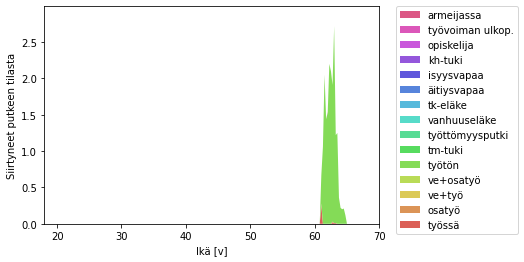

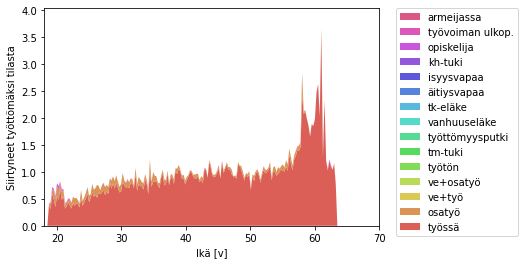

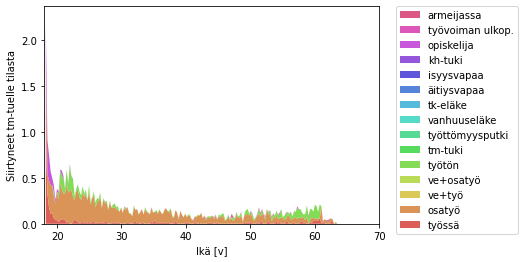

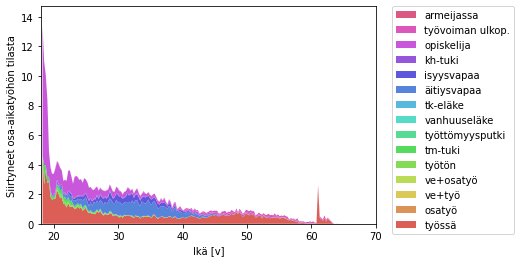

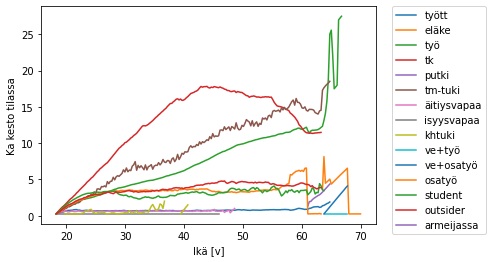

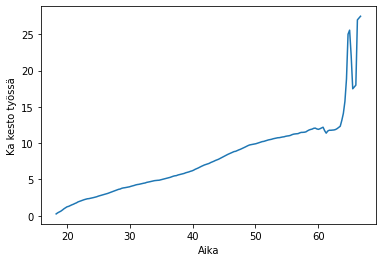

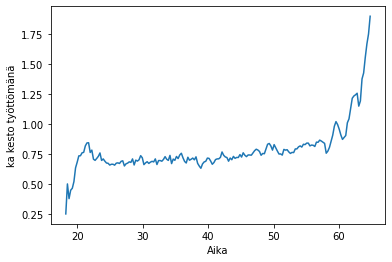

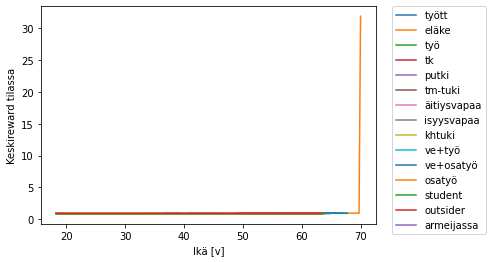

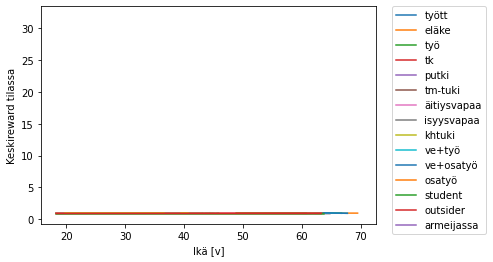

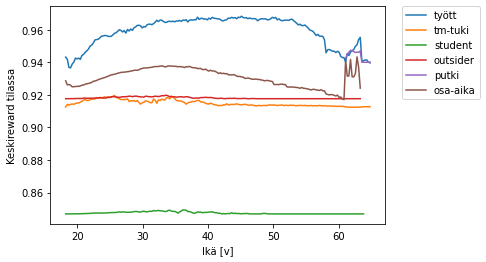

No handles with labels found to put in legend.


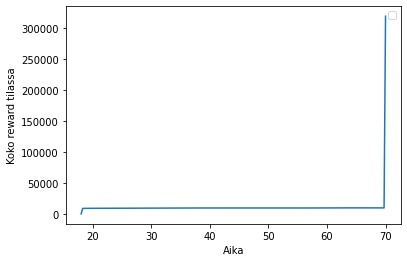

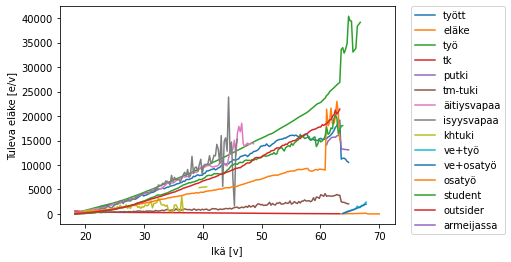

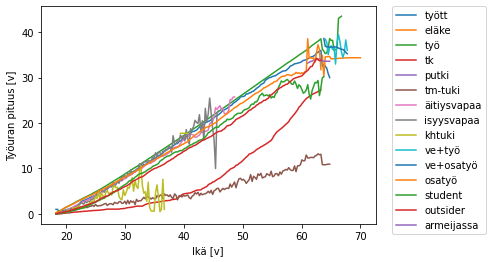

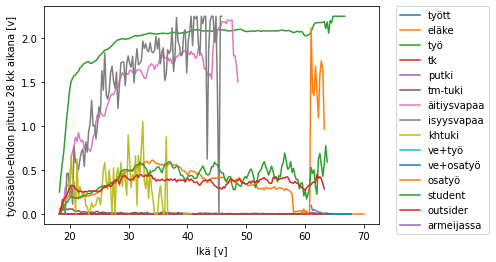

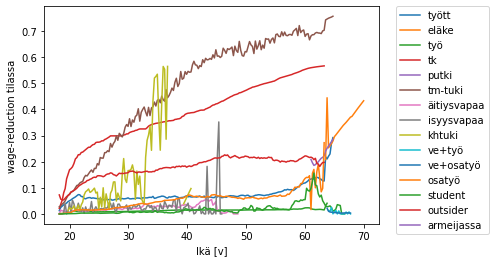

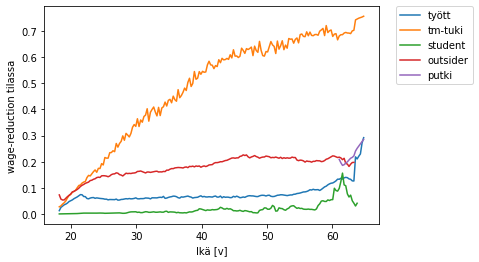

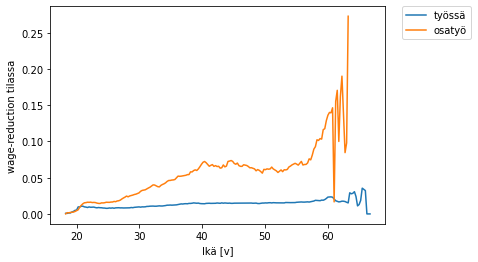

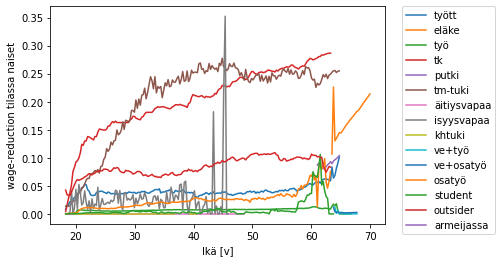

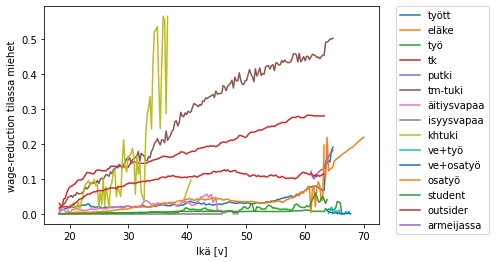

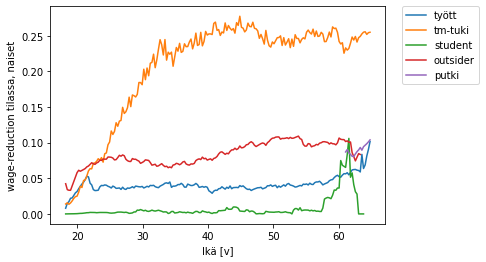

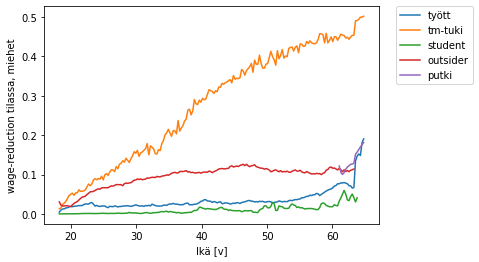

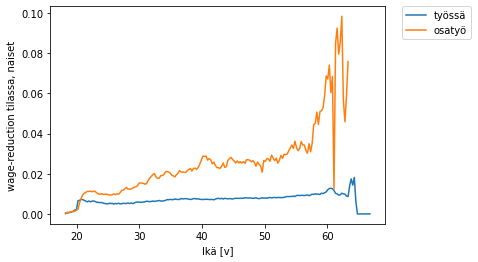

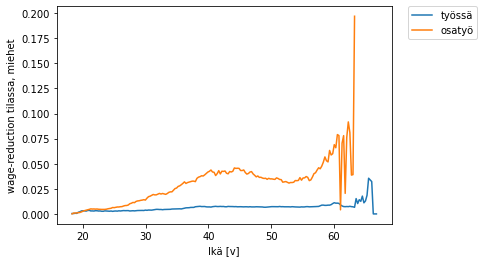

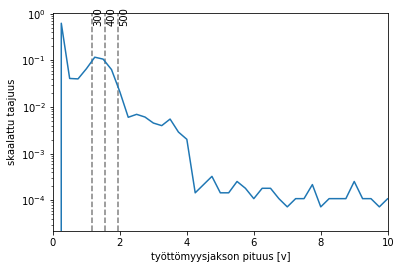

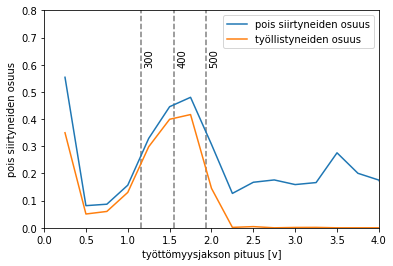

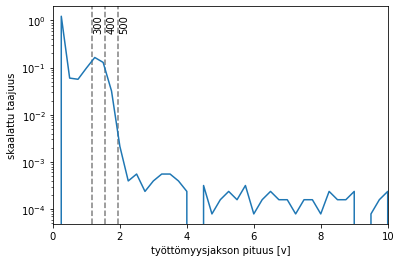

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


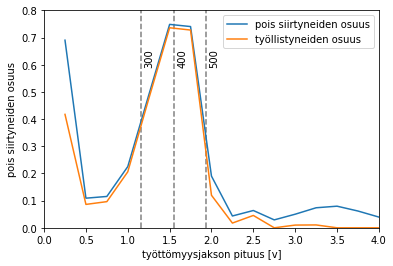

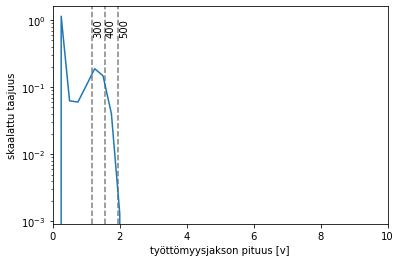

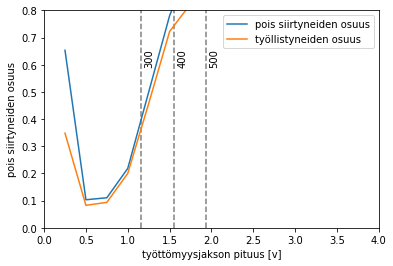

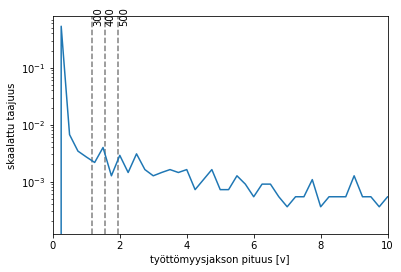

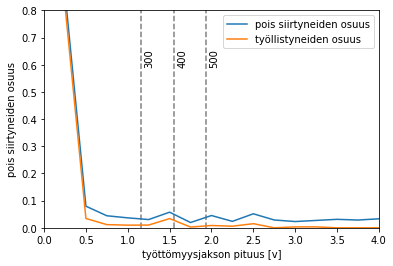

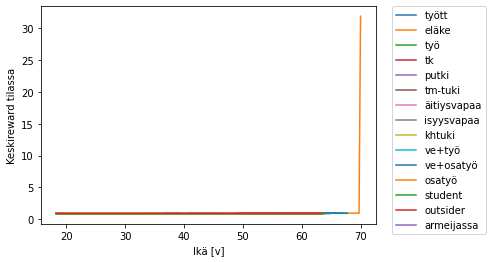

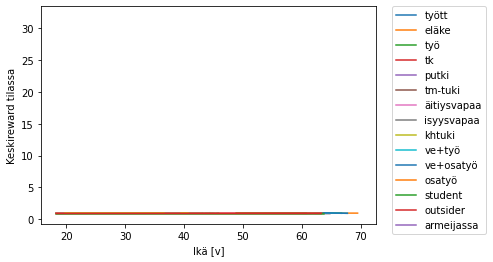

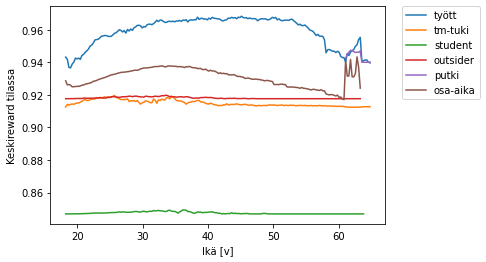

No handles with labels found to put in legend.


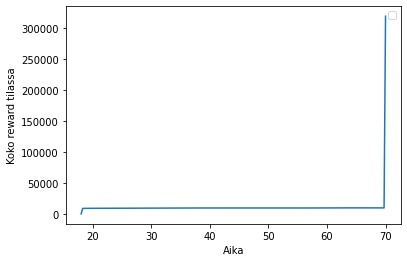

In [7]:
cc1=Lifecycle(env='unemployment-v3',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug,year=year)
cc1.render(load=perusresults,figname='v3_')

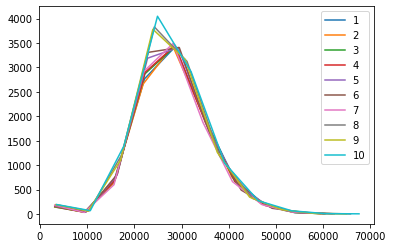

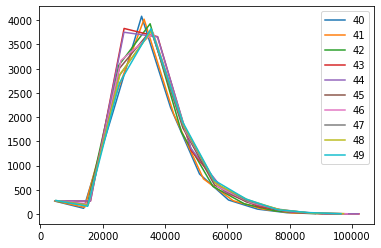

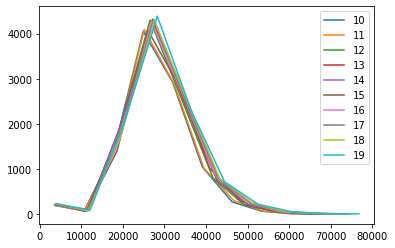

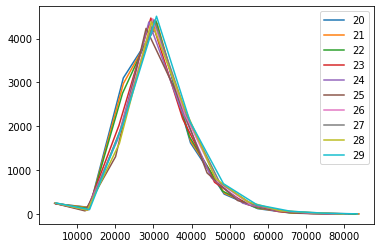

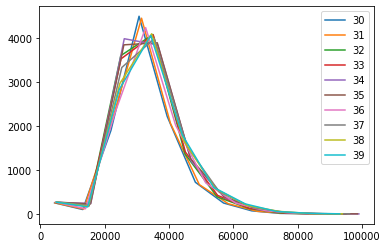

In [8]:
for t in set([1,10,20,30,40]):
    cc1.episodestats.plot_saldist(t)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 18
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_kesto500 500
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
perustulo False

sigma_reduction True
plotdebug False

additional_tyel_premium 0.0
scale_tyel_accrual False

version 2
n_pop 10000


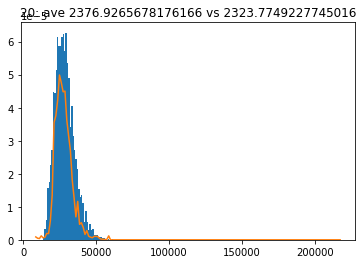

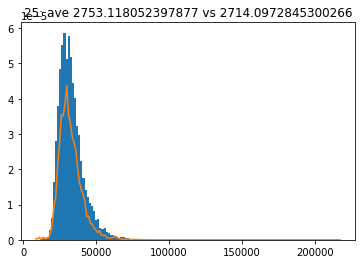

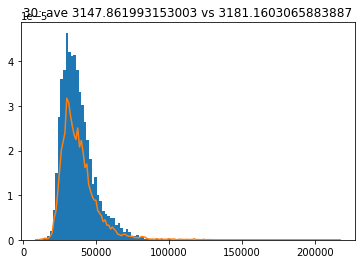

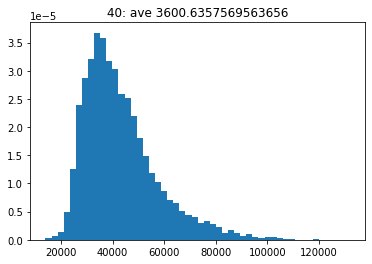

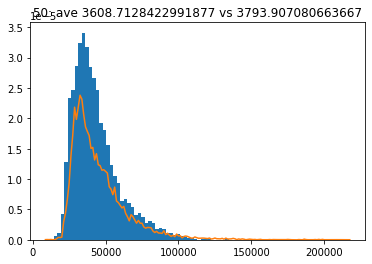

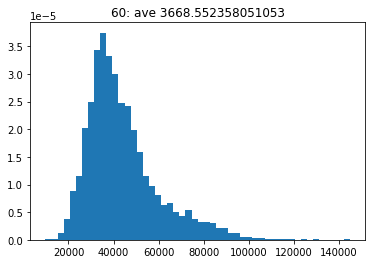

ValueError: x and y must have same first dimension, but have shapes (51,) and (53,)

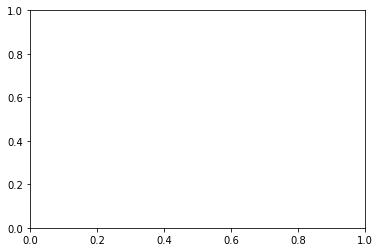

In [9]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.test_salaries()

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#
#cc1.env.unit_test_code_decode()

# IRR

In [ ]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.env.test_comp_npv()

# test

In [ ]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.load_sim(perusresults)
#cc1.episodestats.get_vanhempainvapaat()
#cc1.episodestats.get_vanhempainvapaat_md()

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.plot_emp_by_gender()

# Työssäoloehto 0,5

# Työssäoloehto porrastaa työttömyysturvaa